In [1]:
import pandas as pd

# Load the dataset
file_path = './CC_GENERAL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its information
data_info = data.info()
data_head = data.head()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

(  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0  C10001    40.900749           0.818182      95.40              0.00   
 1  C10002  3202.467416           0.909091       0.00              0.00   
 2  C10003  2495.148862           1.000000     773.17            773.17   
 3  C10004  1666.670542           0.636364    1499.00           1499.00   
 4  C10005   817.714335           1.000000      16.00             16.00   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                    95.4      0.000000             0.166667   
 1                     0.0   6442.945483             0.000000   
 2                     0.0      0.000000             1.000000   
 3                     0.0    205.788017             0.083333   
 4                     0.0      0.000000             0.083333   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                    0.000000                          0.083333   
 1                  

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Dropping the 'CUST_ID' column as it is not needed for clustering
data_clustering = data.drop(['CUST_ID'], axis=1)

# Imputing missing values with median
imputer = SimpleImputer(strategy='median')
data_clustering_imputed = imputer.fit_transform(data_clustering)

# Normalizing the dataset
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering_imputed)

# Converting the normalized data back to a DataFrame for easier manipulation later
data_normalized_df = pd.DataFrame(data_normalized, columns=data_clustering.columns)

data_normalized_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Applying DBSCAN with initial default parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_normalized_df)

# Calculating the silhouette score
# Note: Silhouette score can only be calculated if more than one cluster is formed, excluding noise.
if len(set(clusters)) > 1:
    silhouette = silhouette_score(data_normalized_df, clusters)
else:
    silhouette = "Not applicable - only one cluster formed"

clusters_unique = len(set(clusters)) - (1 if -1 in clusters else 0), "Unique clusters formed (excluding noise)"
noise_points = list(clusters).count(-1), "Noise points identified"

clusters_unique, noise_points, silhouette


((36, 'Unique clusters formed (excluding noise)'),
 (6624, 'Noise points identified'),
 -0.4658992441861622)

In [4]:
# Attempting DBSCAN with adjusted parameters
# Increasing eps for larger neighborhood, and adjusting min_samples to consider denser clusters
dbscan_adjusted = DBSCAN(eps=1, min_samples=10)
clusters_adjusted = dbscan_adjusted.fit_predict(data_normalized_df)

# Calculating the silhouette score for the adjusted parameters
if len(set(clusters_adjusted)) > 1:
    silhouette_adjusted = silhouette_score(data_normalized_df, clusters_adjusted)
else:
    silhouette_adjusted = "Not applicable - only one cluster formed"

clusters_unique_adjusted = len(set(clusters_adjusted)) - (1 if -1 in clusters_adjusted else 0), "Unique clusters formed (excluding noise)"
noise_points_adjusted = list(clusters_adjusted).count(-1), "Noise points identified"

clusters_unique_adjusted, noise_points_adjusted, silhouette_adjusted


((3, 'Unique clusters formed (excluding noise)'),
 (3632, 'Noise points identified'),
 0.08534058707127808)

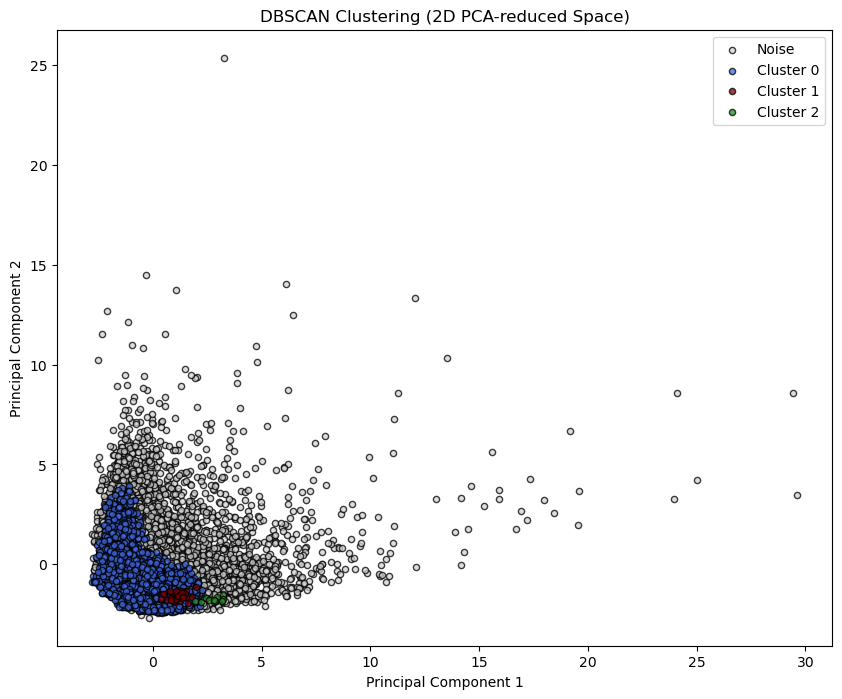

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing the dataset to 2 principal components for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized_df)

# Plotting the 2D visualization
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color, and noise points in grey
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
for i in range(-1, len(set(clusters_adjusted)) - 1):
    if i == -1:
        # Noise points
        color = 'lightgrey'
    else:
        color = colors[i % len(colors)]
    plt.scatter(data_pca[clusters_adjusted == i, 0], data_pca[clusters_adjusted == i, 1], c=color, label=f'Cluster {i}' if i != -1 else 'Noise', edgecolor='k', s=20, alpha=0.75)

plt.title('DBSCAN Clustering (2D PCA-reduced Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
# save the plot
plt.savefig('dbscanPCA.png')
plt.show()


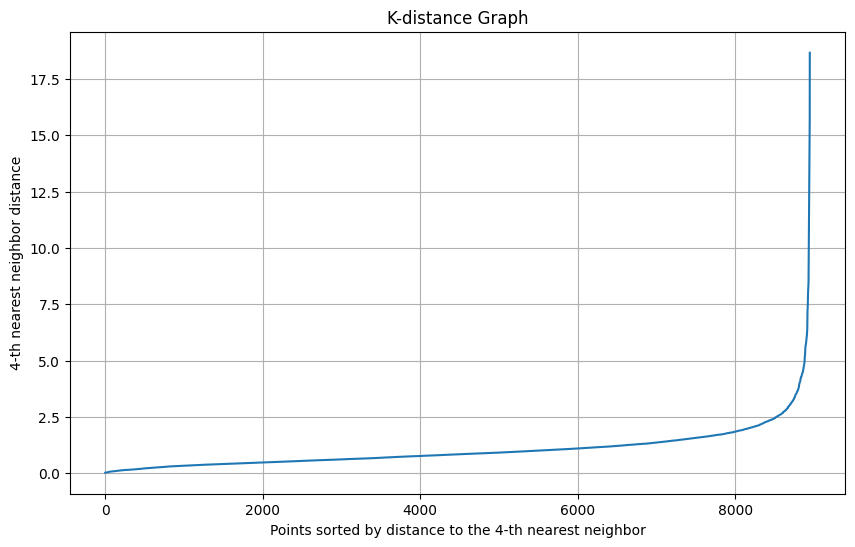

In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Using NearestNeighbors to find the distance to the nearest n_neighbors
n_neighbors = 4
nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
nearest_neighbors.fit(data_normalized_df)
distances, indices = nearest_neighbors.kneighbors(data_normalized_df)

# Sorting the distances
sorted_distances = np.sort(distances[:, n_neighbors-1], axis=0)

# Plotting the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the {}-th nearest neighbor'.format(n_neighbors))
plt.ylabel('{}-th nearest neighbor distance'.format(n_neighbors))
plt.title('K-distance Graph')
plt.grid(True)
plt.show()


In [7]:
# Choosing a new eps value based on the k-distance graph observation
# This is a bit subjective, but let's pick a value that seems like a reasonable compromise
# new_eps = sorted_distances[int(len(sorted_distances) * 0.7)]  # Picking a value from the 70th percentile
new_eps = sorted_distances[int(len(sorted_distances) * 0.8)]  # Picking a value from the 90th percentile
new_min_samples = 10  # Adjusting based on the dataset's size and distribution

# Applying DBSCAN with the new parameters
dbscan_optimized = DBSCAN(eps=new_eps, min_samples=new_min_samples)
clusters_optimized = dbscan_optimized.fit_predict(data_normalized_df)

# Calculating the silhouette score for the optimized parameters
if len(set(clusters_optimized)) > 1:
    silhouette_optimized = silhouette_score(data_normalized_df, clusters_optimized)
else:
    silhouette_optimized = "Not applicable - only one cluster formed"

clusters_unique_optimized = len(set(clusters_optimized)) - (1 if -1 in clusters_optimized else 0), "Unique clusters formed (excluding noise)"
noise_points_optimized = list(clusters_optimized).count(-1), "Noise points identified"

clusters_unique_optimized, noise_points_optimized, silhouette_optimized


((1, 'Unique clusters formed (excluding noise)'),
 (1771, 'Noise points identified'),
 0.31416016494356686)

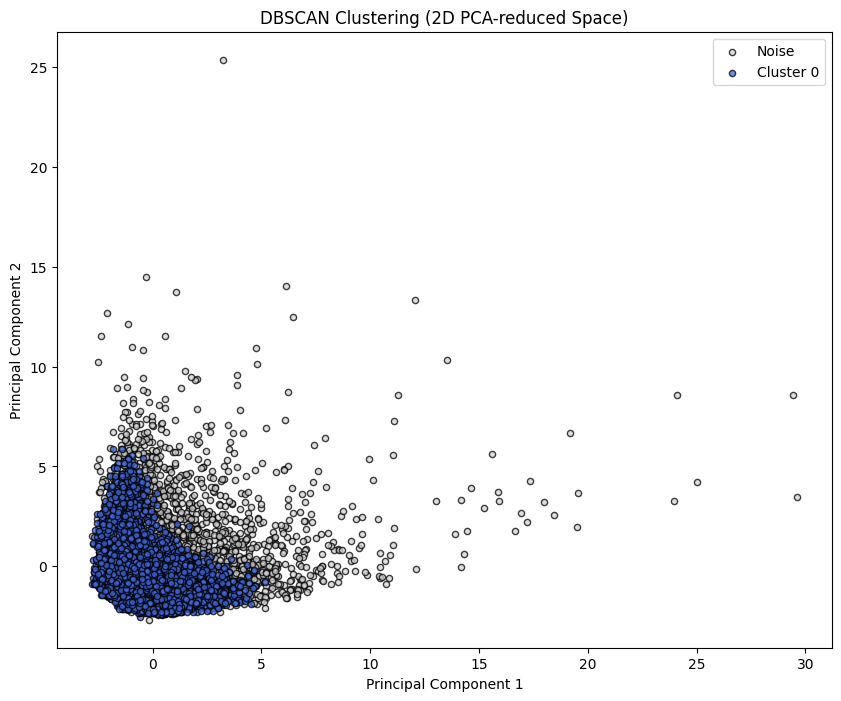

In [15]:
#plot again
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing the dataset to 2 principal components for 2D visualization
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_normalized_df)

# Plotting the 2D visualization
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color, and noise points in grey
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'] 
for i in range(-1, len(set(clusters_optimized)) - 1):
    if i == -1:
        # Noise points
        color = 'lightgrey'
    else:
        color = colors[i % len(colors)]
    plt.scatter(data_pca[clusters_optimized == i, 0], data_pca[clusters_optimized == i, 1], c=color, label=f'Cluster {i}' if i != -1 else 'Noise', edgecolor='k', s=20, alpha=0.75)

plt.title('DBSCAN Clustering (2D PCA-reduced Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


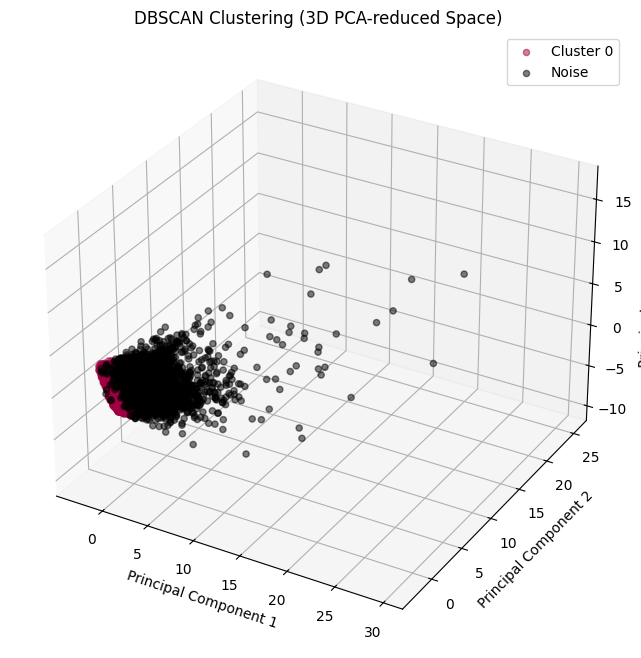

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Reducing the dataset to 3 principal components for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_normalized_df)

# Plotting the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(clusters_optimized))))

# Plot each cluster with a different color
for cluster_id, color in zip(set(clusters_optimized), colors):
    if cluster_id == -1:
        # Noise points are colored black
        ax.scatter(data_pca_3d[clusters_optimized == cluster_id, 0], 
                   data_pca_3d[clusters_optimized == cluster_id, 1], 
                   data_pca_3d[clusters_optimized == cluster_id, 2], 
                   c='black', 
                   label='Noise', 
                   alpha=0.5)
    else:
        ax.scatter(data_pca_3d[clusters_optimized == cluster_id, 0], 
                   data_pca_3d[clusters_optimized == cluster_id, 1], 
                   data_pca_3d[clusters_optimized == cluster_id, 2], 
                   c=[color], 
                   label=f'Cluster {cluster_id}', 
                   alpha=0.5)

ax.set_title('DBSCAN Clustering (3D PCA-reduced Space)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()
